In [2]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.preprocessing import MinMaxScaler
import warnings
import logging
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import regularizers
tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)
import math
seed=42
import tensorflow as tf

!pip install pyDOE

2023-09-14 10:16:15.310495: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-14 10:16:15.337235: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-14 10:16:15.529177: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-14 10:16:15.530517: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-14 10:16:16.590307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

2.13.0


In [3]:
#you need to add a dataset with GaussJacobiQuadRule_V3 on the right 
import sys
# sys.path.insert(1, '/kaggle/input/quadrule')
from GaussJacobiQuadRule_V3 import Jacobi, DJacobi, GaussLobattoJacobiWeights, GaussJacobiWeights

import pyDOE

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pyDOE import lhs
#from GaussJacobiQuadRule_V3.py import Jacobi, DJacobi, GaussLobattoJacobiWeights, GaussJacobiWeights
import time

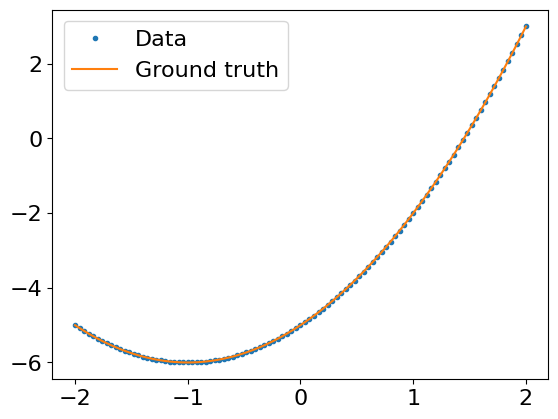

In [52]:
n_points=101
x = tf.linspace(-2, 2, n_points)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + 0*tf.random.normal(shape=[n_points])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x),  label='Ground truth')
plt.legend()
x_=tf. expand_dims(x,-1)
y_=tf. expand_dims(y,-1)


In [55]:
input_shape=(1,)
seed=42
input_layer = tfkl.Input(shape=input_shape, name='Input')
x1 = tfkl.Dense(16, activation='sigmoid', kernel_initializer = tfk.initializers.GlorotUniform(seed))(input_layer)
x2 = tfkl.Dense(64, activation='sigmoid', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x1)
x3 = tfkl.Dense(16, activation='sigmoid', kernel_initializer = tfk.initializers.GlorotUniform(seed))(x2)

outputs = tf.keras.layers.Dense(1,activation='linear')(x3)

In [56]:
input_shape=(1,)
model = tf.keras.Model(input_layer, outputs)
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 1)]               0         
                                                                 
 dense_36 (Dense)            (None, 16)                32        
                                                                 
 dense_37 (Dense)            (None, 64)                1088      
                                                                 
 dense_38 (Dense)            (None, 16)                1040      
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2177 (8.50 KB)
Trainable params: 2177 (8.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


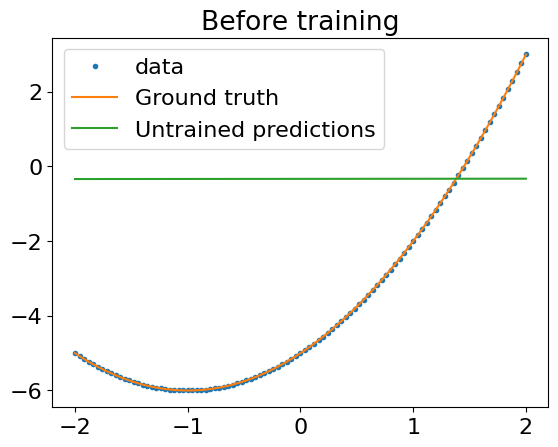

In [57]:
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend();

In [58]:
epochs=1000
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

for step in range(0,epochs):
    with tf.GradientTape() as tape:
        pred = model(x)
        loss_value=tf.reduce_mean(tf.math.squared_difference(pred, y))
    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))

    if step % 10 == 0:
            print(
                "Training loss at step %d: %.4f"
                % (step, float(loss_value))
            )



Training loss at step 0: 17.8636
Training loss at step 10: 15.1637
Training loss at step 20: 13.0295
Training loss at step 30: 11.4241
Training loss at step 40: 10.2463
Training loss at step 50: 9.3939
Training loss at step 60: 8.7796
Training loss at step 70: 8.3328
Training loss at step 80: 8.0008
Training loss at step 90: 7.7479
Training loss at step 100: 7.5529
Training loss at step 110: 7.4030
Training loss at step 120: 7.2882
Training loss at step 130: 7.2003
Training loss at step 140: 7.1330
Training loss at step 150: 7.0812
Training loss at step 160: 7.0415
Training loss at step 170: 7.0111
Training loss at step 180: 6.9878
Training loss at step 190: 6.9702
Training loss at step 200: 6.9568
Training loss at step 210: 6.9467
Training loss at step 220: 6.9392
Training loss at step 230: 6.9336
Training loss at step 240: 6.9295
Training loss at step 250: 6.9265
Training loss at step 260: 6.9244
Training loss at step 270: 6.9228
Training loss at step 280: 6.9217
Training loss at ste

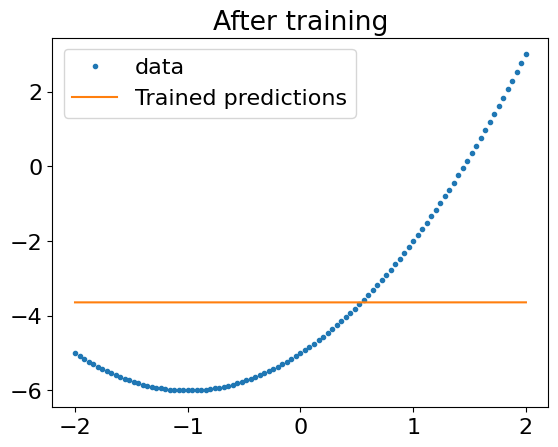

In [59]:
plt.plot(x.numpy(),y.numpy(), '.', label="data")
plt.plot(x, model(x_), label='Trained predictions')
plt.title('After training')
plt.legend();